# Importing libraries

In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import Datasets as DS
import Methods as Md
import DownstreamAnalysis as DA
from sklearn.metrics.pairwise import euclidean_distances

# Loading data

In [3]:
dir = 'D:/Research/NeuroDAVIS/Results/2D/Comparison/'
X,y = DS.LoadData('Olympic')

In [4]:
c1=[0,1,2,3,4]
c2=['b','k','r','y','g']
cols = map(lambda x: c2[c1.index(x)], y)
cs = [i for i in list(cols)]

# Applying T-SNE

In [5]:
X_tsne = Md.UseMethod('TSNE', X)

# Plotting the results

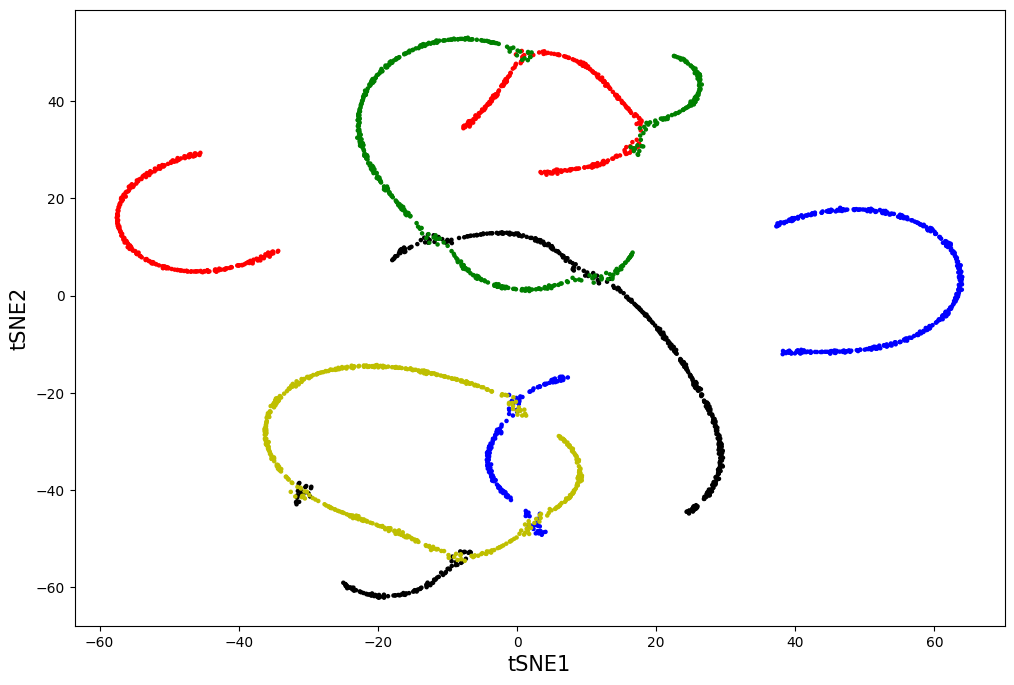

In [6]:
plt.figure(figsize=(12,8))
plt.scatter(X_tsne[:,0],X_tsne[:,1],c=cs,s=5)
plt.xlabel("tSNE1", fontsize = 15)
plt.ylabel("tSNE2", fontsize = 15)
#plt.show()
plt.savefig(dir+'Olympic_tSNE.eps', dpi = 1200, format = 'eps')

# Applying UMAP

In [7]:
X_umap = Md.UseMethod('UMAP', X)

# Plotting the results

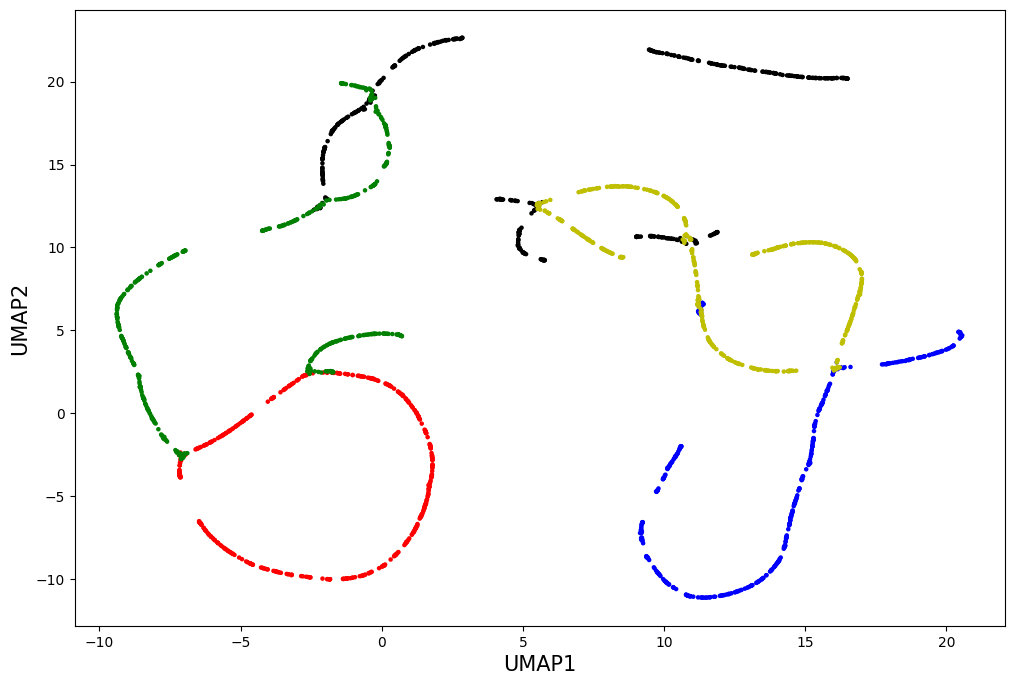

In [8]:
plt.figure(figsize=(12,8))
plt.scatter(X_umap[:,0],X_umap[:,1],c=cs,s=5)
plt.xlabel("UMAP1", fontsize = 15)
plt.ylabel("UMAP2", fontsize = 15)
#plt.show()
plt.savefig(dir+'Olympic_UMAP.eps', dpi = 1200, format = 'eps')

# Spearman correlation

In [9]:
iteration = 10
score_tsne = []
score_umap = []
dist_orig = np.square(euclidean_distances(X, X)).flatten()
for i in range(iteration):
    print("Iteration {}".format(i+1))
    print("----TSNE")
    X_tsne = Md.UseMethod('TSNE', X)
    dist_method = np.square(euclidean_distances(X_tsne, X_tsne)).flatten()
    score_tsne.append(DA.correlation(dist_orig, dist_method))
    print("----UMAP")
    X_umap = Md.UseMethod('UMAP', X)
    dist_method = np.square(euclidean_distances(X_umap, X_umap)).flatten()
    score_umap.append(DA.correlation(dist_orig, dist_method))

Iteration 1
----TSNE
----UMAP
Iteration 2
----TSNE
----UMAP
Iteration 3
----TSNE
----UMAP
Iteration 4
----TSNE
----UMAP
Iteration 5
----TSNE
----UMAP
Iteration 6
----TSNE
----UMAP
Iteration 7
----TSNE
----UMAP
Iteration 8
----TSNE
----UMAP
Iteration 9
----TSNE
----UMAP
Iteration 10
----TSNE
----UMAP


In [10]:
result = pd.DataFrame(list(zip(score_tsne, score_umap)),
               columns =['tSNE','UMAP'])
result

,tSNE,UMAP
0,0.618612,0.655383
1,0.514789,0.680432
2,0.711693,0.677231
3,0.606903,0.757794
4,0.411201,0.760915
5,0.407763,0.653626
6,0.713593,0.747041
7,0.778284,0.750736
8,0.516149,0.675492
9,0.771311,0.715404


# Projecting data into high dimension and applying other methods
Using projection: $(x,y) \rightarrow (x+y,x-y,xy,x^2,y^2,x^2y,xy^2,x^3,y^3)$

In [11]:
from D2toD9 import Convert
X_9D = Convert(X)

# Applying T-SNE

In [12]:
X_tsne = Md.UseMethod('TSNE', X_9D)

# Plotting the results

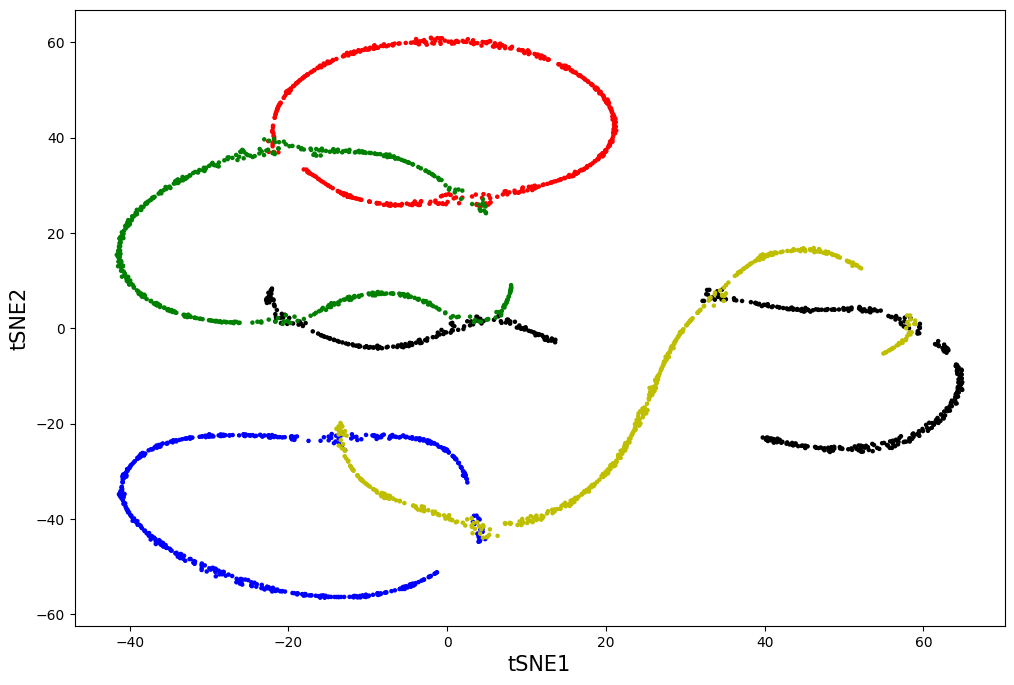

In [13]:
plt.figure(figsize=(12,8))
plt.scatter(X_tsne[:,0],X_tsne[:,1],c=cs,s=5)
plt.xlabel("tSNE1", fontsize = 15)
plt.ylabel("tSNE2", fontsize = 15)
#plt.show()
plt.savefig(dir+'Olympic_tSNE_2D_9D_2D.eps', dpi = 1200, format = 'eps')

# Applying UMAP

In [14]:
X_umap = Md.UseMethod('UMAP', X_9D)

# Plotting the results

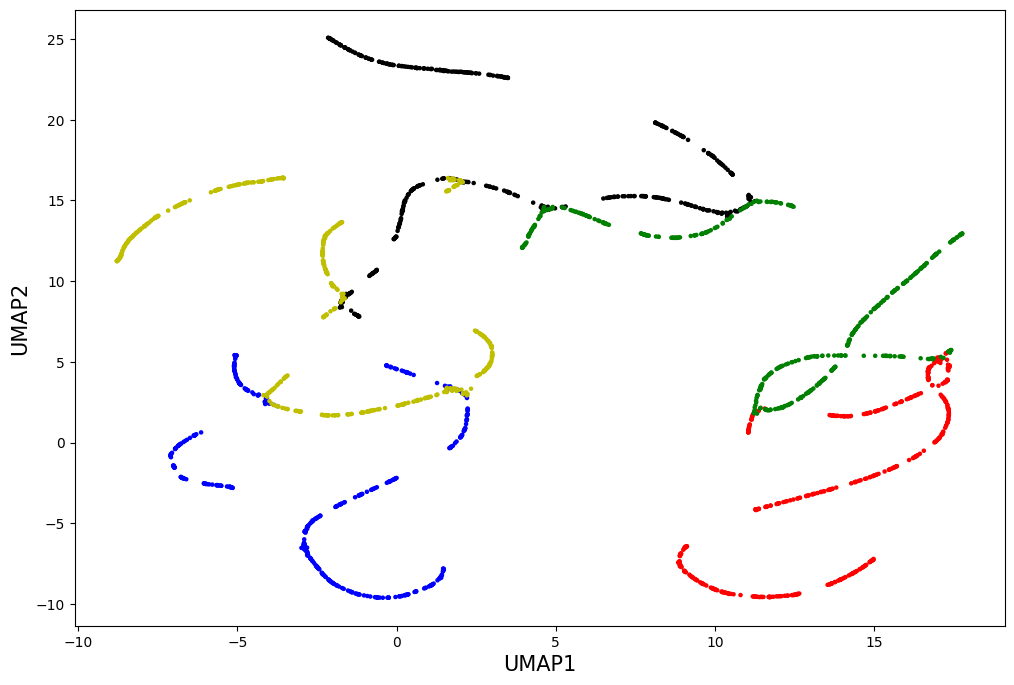

In [15]:
plt.figure(figsize=(12,8))
plt.scatter(X_umap[:,0],X_umap[:,1],c=cs,s=5)
plt.xlabel("UMAP1", fontsize = 15)
plt.ylabel("UMAP2", fontsize = 15)
#plt.show()
plt.savefig(dir+'Olympic_UMAP_2D_9D_2D.eps', dpi = 1200, format = 'eps')

# Spearman correlation

In [16]:
iteration = 10
score_tsne = []
score_umap = []
dist_orig = np.square(euclidean_distances(X_9D, X_9D)).flatten()
for i in range(iteration):
    print("Iteration {}".format(i+1))
    print("----TSNE")
    X_tsne = Md.UseMethod('TSNE', X)
    dist_method = np.square(euclidean_distances(X_tsne, X_tsne)).flatten()
    score_tsne.append(DA.correlation(dist_orig, dist_method))
    print("----UMAP")
    X_umap = Md.UseMethod('UMAP', X)
    dist_method = np.square(euclidean_distances(X_umap, X_umap)).flatten()
    score_umap.append(DA.correlation(dist_orig, dist_method))

Iteration 1
----TSNE
----UMAP
Iteration 2
----TSNE
----UMAP
Iteration 3
----TSNE
----UMAP
Iteration 4
----TSNE
----UMAP
Iteration 5
----TSNE
----UMAP
Iteration 6
----TSNE
----UMAP
Iteration 7
----TSNE
----UMAP
Iteration 8
----TSNE
----UMAP
Iteration 9
----TSNE
----UMAP
Iteration 10
----TSNE
----UMAP


In [17]:
result = pd.DataFrame(list(zip(score_tsne, score_umap)),
               columns =['tSNE','UMAP'])
result

,tSNE,UMAP
0,0.204651,0.534133
1,0.451551,0.533700
2,0.555187,0.576890
3,0.550579,0.550125
4,0.287422,0.535655
5,0.376473,0.569098
6,0.196938,0.531971
7,0.456141,0.541576
8,0.395972,0.582161
9,0.380585,0.604146
